In [68]:
from dask import array, dataframe, bag

### Arrays: Parallelized NumPy

In [69]:
da = array.random.binomial(100, .3, 1000, chunks=(100))

In [70]:
da.size

1000

In [71]:
da[:2]

dask.array<getitem..., shape=(2,), dtype=int64, chunksize=(2,)>

In [72]:
da[:2].compute()

array([20, 35])

In [73]:
da.npartitions

10

In [74]:
da[:400].chunks

((100, 100, 100, 100),)

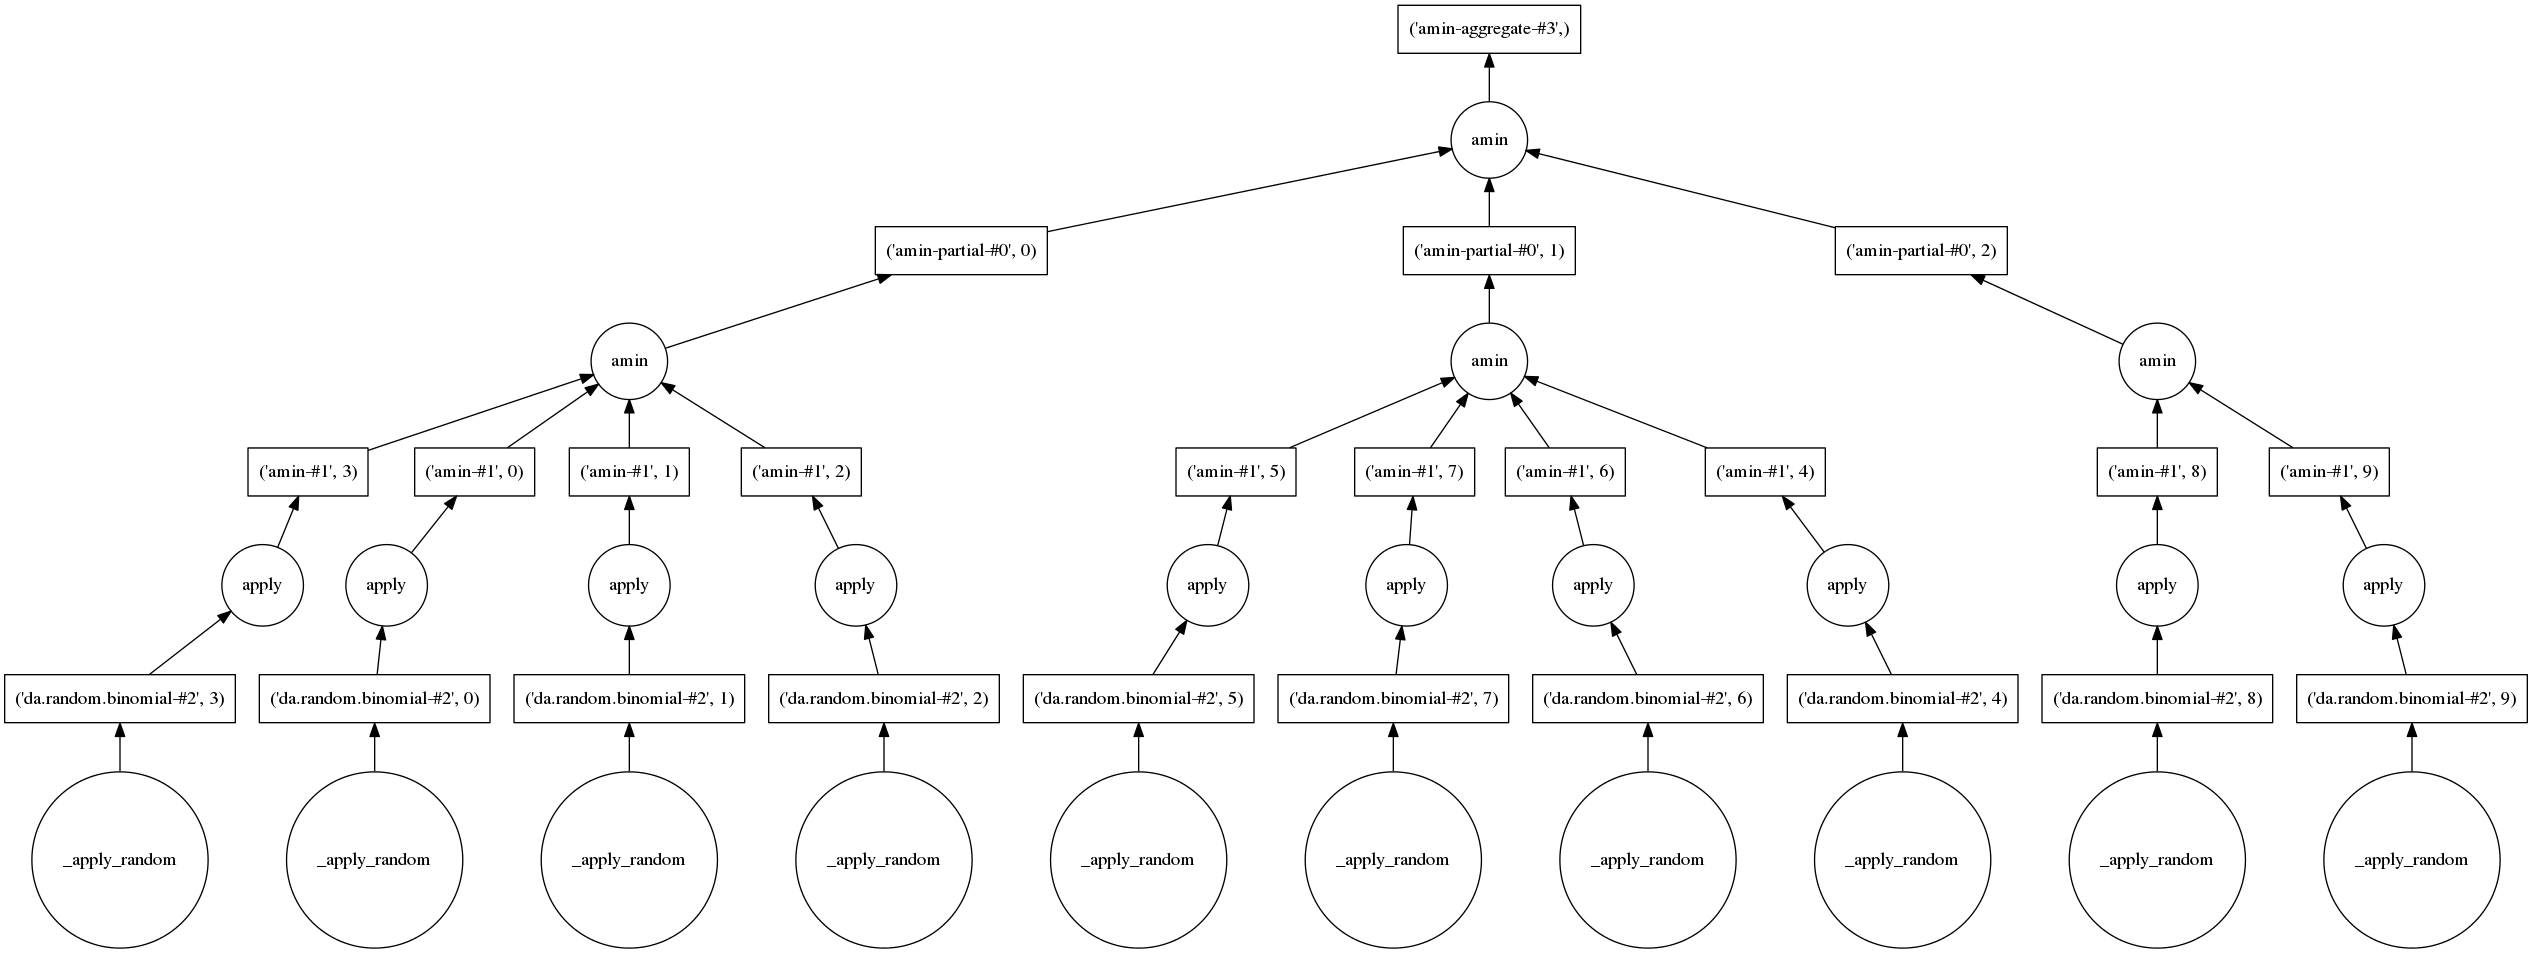

In [75]:
da.min().visualize()

In [76]:
da.min().compute()

14

### Dataframe: Parallelized Pandas

In [77]:
df = dataframe.read_csv('../data/speakers.csv')

In [78]:
df.head()

,last_name,num_opinions,nationality,email,num_speeches,num_motions,chair_positions,twitter,speaker_id,curr_pol_group,...,facebook,natl_pol_groups,num_reports,num_questions,curr_pol_group_abbr,num_declarations,website,speeches_url,speaker_url,first_name
0,AKER,0,United Kingdom,ue[dot]aporue.lraporue[at]reka.mit,1.0,1.0,NaN,https://twitter.com/Tim_Aker,99650,Europe of Freedom and Direct Democracy Group,...,https://www.facebook.com/TimAkerMEP?fref=ts,NaN,0,NaN,efd,NaN,http://www.timakermep.org/site/,http://www.europarl.europa.eu/meps/en/99650/se...,http://www.europarl.europa.eu/meps/en/99650/TI...,Tim
1,ADINOLFI,2,Italy,ue[dot]aporue.lraporue[at]iflonida.allebasi,4.0,1.0,NaN,http://twitter.com/Isa_Adinolfi,124831,Europe of Freedom and Direct Democracy Group,...,http://www.facebook.com/adinolfiisabella,NaN,1,NaN,efd,NaN,http://www.adinolfi.eu.org,http://www.europarl.europa.eu/meps/en/124831/s...,http://www.europarl.europa.eu/meps/en/124831/I...,Isabella
2,ADAKTUSSON,2,Sweden,ue[dot]aporue.lraporue[at]nossutkada.sral,9.0,2.0,01.07.2014 ...:Group of the European People's ...,https://twitter.com/Ladaktusson,124990,Group of the European People's Party (Christia...,...,https://sv-se.facebook.com/adaktusson,NaN,1,NaN,epp,NaN,http://adaktusson.eu,http://www.europarl.europa.eu/meps/en/124990/s...,http://www.europarl.europa.eu/meps/en/124990/L...,Lars
3,ALI,9,Bulgaria,ue[dot]aporue.lraporue[at]ila.imhzden,1.0,1.0,26.09.2005 / 31.12.2006:Group of the Alliance ...,NaN,34250,Group of the Alliance of Liberals and Democrat...,...,NaN,NaN,7,NaN,aldeadle,NaN,NaN,http://www.europarl.europa.eu/meps/en/34250/se...,http://www.europarl.europa.eu/meps/en/34250/NE...,Nedzhmi
4,ANDERSON,3,United Kingdom,ue[dot]aporue.lraporue[at]nosredna.ycul,3.0,3.0,NaN,https://twitter.com/LucyAndersonMEP,124949,Group of the Progressive Alliance of Socialist...,...,https://www.facebook.com/LucyAndersonMEP,NaN,3,NaN,sd,NaN,NaN,http://www.europarl.europa.eu/meps/en/124949/s...,http://www.europarl.europa.eu/meps/en/124949/L...,Lucy


In [79]:
df.dtypes

last_name               object
num_opinions             int64
nationality             object
email                   object
num_speeches           float64
num_motions            float64
chair_positions         object
twitter                 object
speaker_id               int64
curr_pol_group          object
all_pol_groups         float64
dob                     object
facebook                object
natl_pol_groups        float64
num_reports              int64
num_questions          float64
curr_pol_group_abbr     object
num_declarations       float64
website                 object
speeches_url            object
speaker_url             object
first_name              object
dtype: object

In [80]:
df.npartitions

1

In [81]:
df.twitter.loc[4]

dd.Series<_try_lo..., npartitions=1>

In [82]:
df.twitter.loc[4].compute()

0    https://twitter.com/LucyAndersonMEP
dtype: object

In [83]:
df.groupby(['nationality', 'curr_pol_group_abbr'])

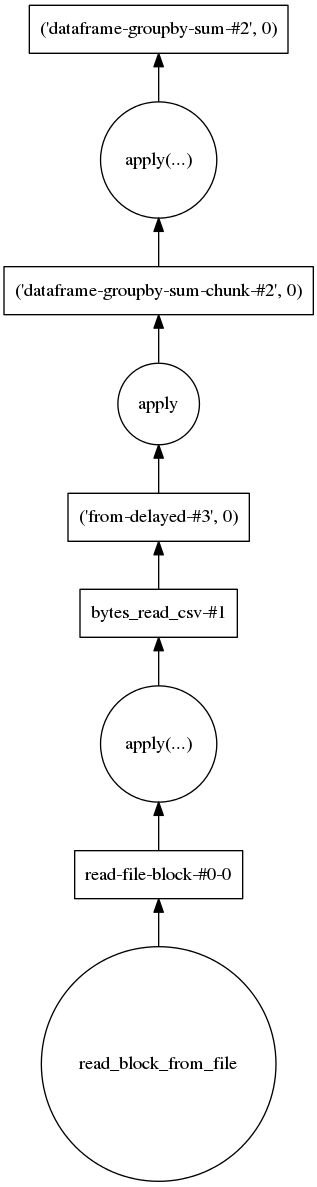

In [84]:
df.groupby(['nationality', 'curr_pol_group_abbr']).sum().visualize()

In [85]:
df2 = df.set_index('speaker_id')

In [86]:
df2.npartitions

1

In [87]:
df.speaker_id.compute().values

array([ 99650, 124831, 124990,  34250, 124949, 113959, 124811, 124842,
       124994,  30190, 124973, 125110, 124936, 124797, 124773,  28307,
        24922, 124958,  28161,  28132, 113892, 124938,   4319, 124766,
        97293,  96680, 124744,  96997, 124871,  96877,  28497, 124956,
       124777,  96955,  96705, 124760,   4507, 125002,  28257,  97198,
       124771,   1985, 124740, 124992, 124712, 125004,   1037,  96681,
       124814, 124867, 124964,  39711, 124896,  21817, 124796, 112748,
       124954,  28346,  96744, 124984, 124757, 125012,   4267,   1263,
        96849,  96739, 124787, 124851, 124818,  28269, 124971,  28122,
       124986,  28451,  28219, 124861,  96603,  26837, 125061,  28154,
       124854, 183793, 124708, 124752,  26851,  96775, 124955,   1892,
       124967, 124988, 124772,  96917,   2309, 124856,  96880,  40224,
       124930, 132925,  35135, 124970,  28238,  28372, 183338,   2109,
        95281, 124952, 124821,  96747,  97296, 124714,  72775, 124732,
      

In [88]:
partitions = sorted(df.speaker_id.compute().values)[::50]

In [89]:
partitions

[840,
 4545,
 28233,
 39724,
 96744,
 96903,
 111024,
 124732,
 124806,
 124870,
 124962,
 125072]

In [90]:
df3 = df.set_partition('speaker_id', partitions)

In [91]:
df3.npartitions

11

In [92]:
df3.divisions

(840,
 4545,
 28233,
 39724,
 96744,
 96903,
 111024,
 124732,
 124806,
 124870,
 124962,
 125072)

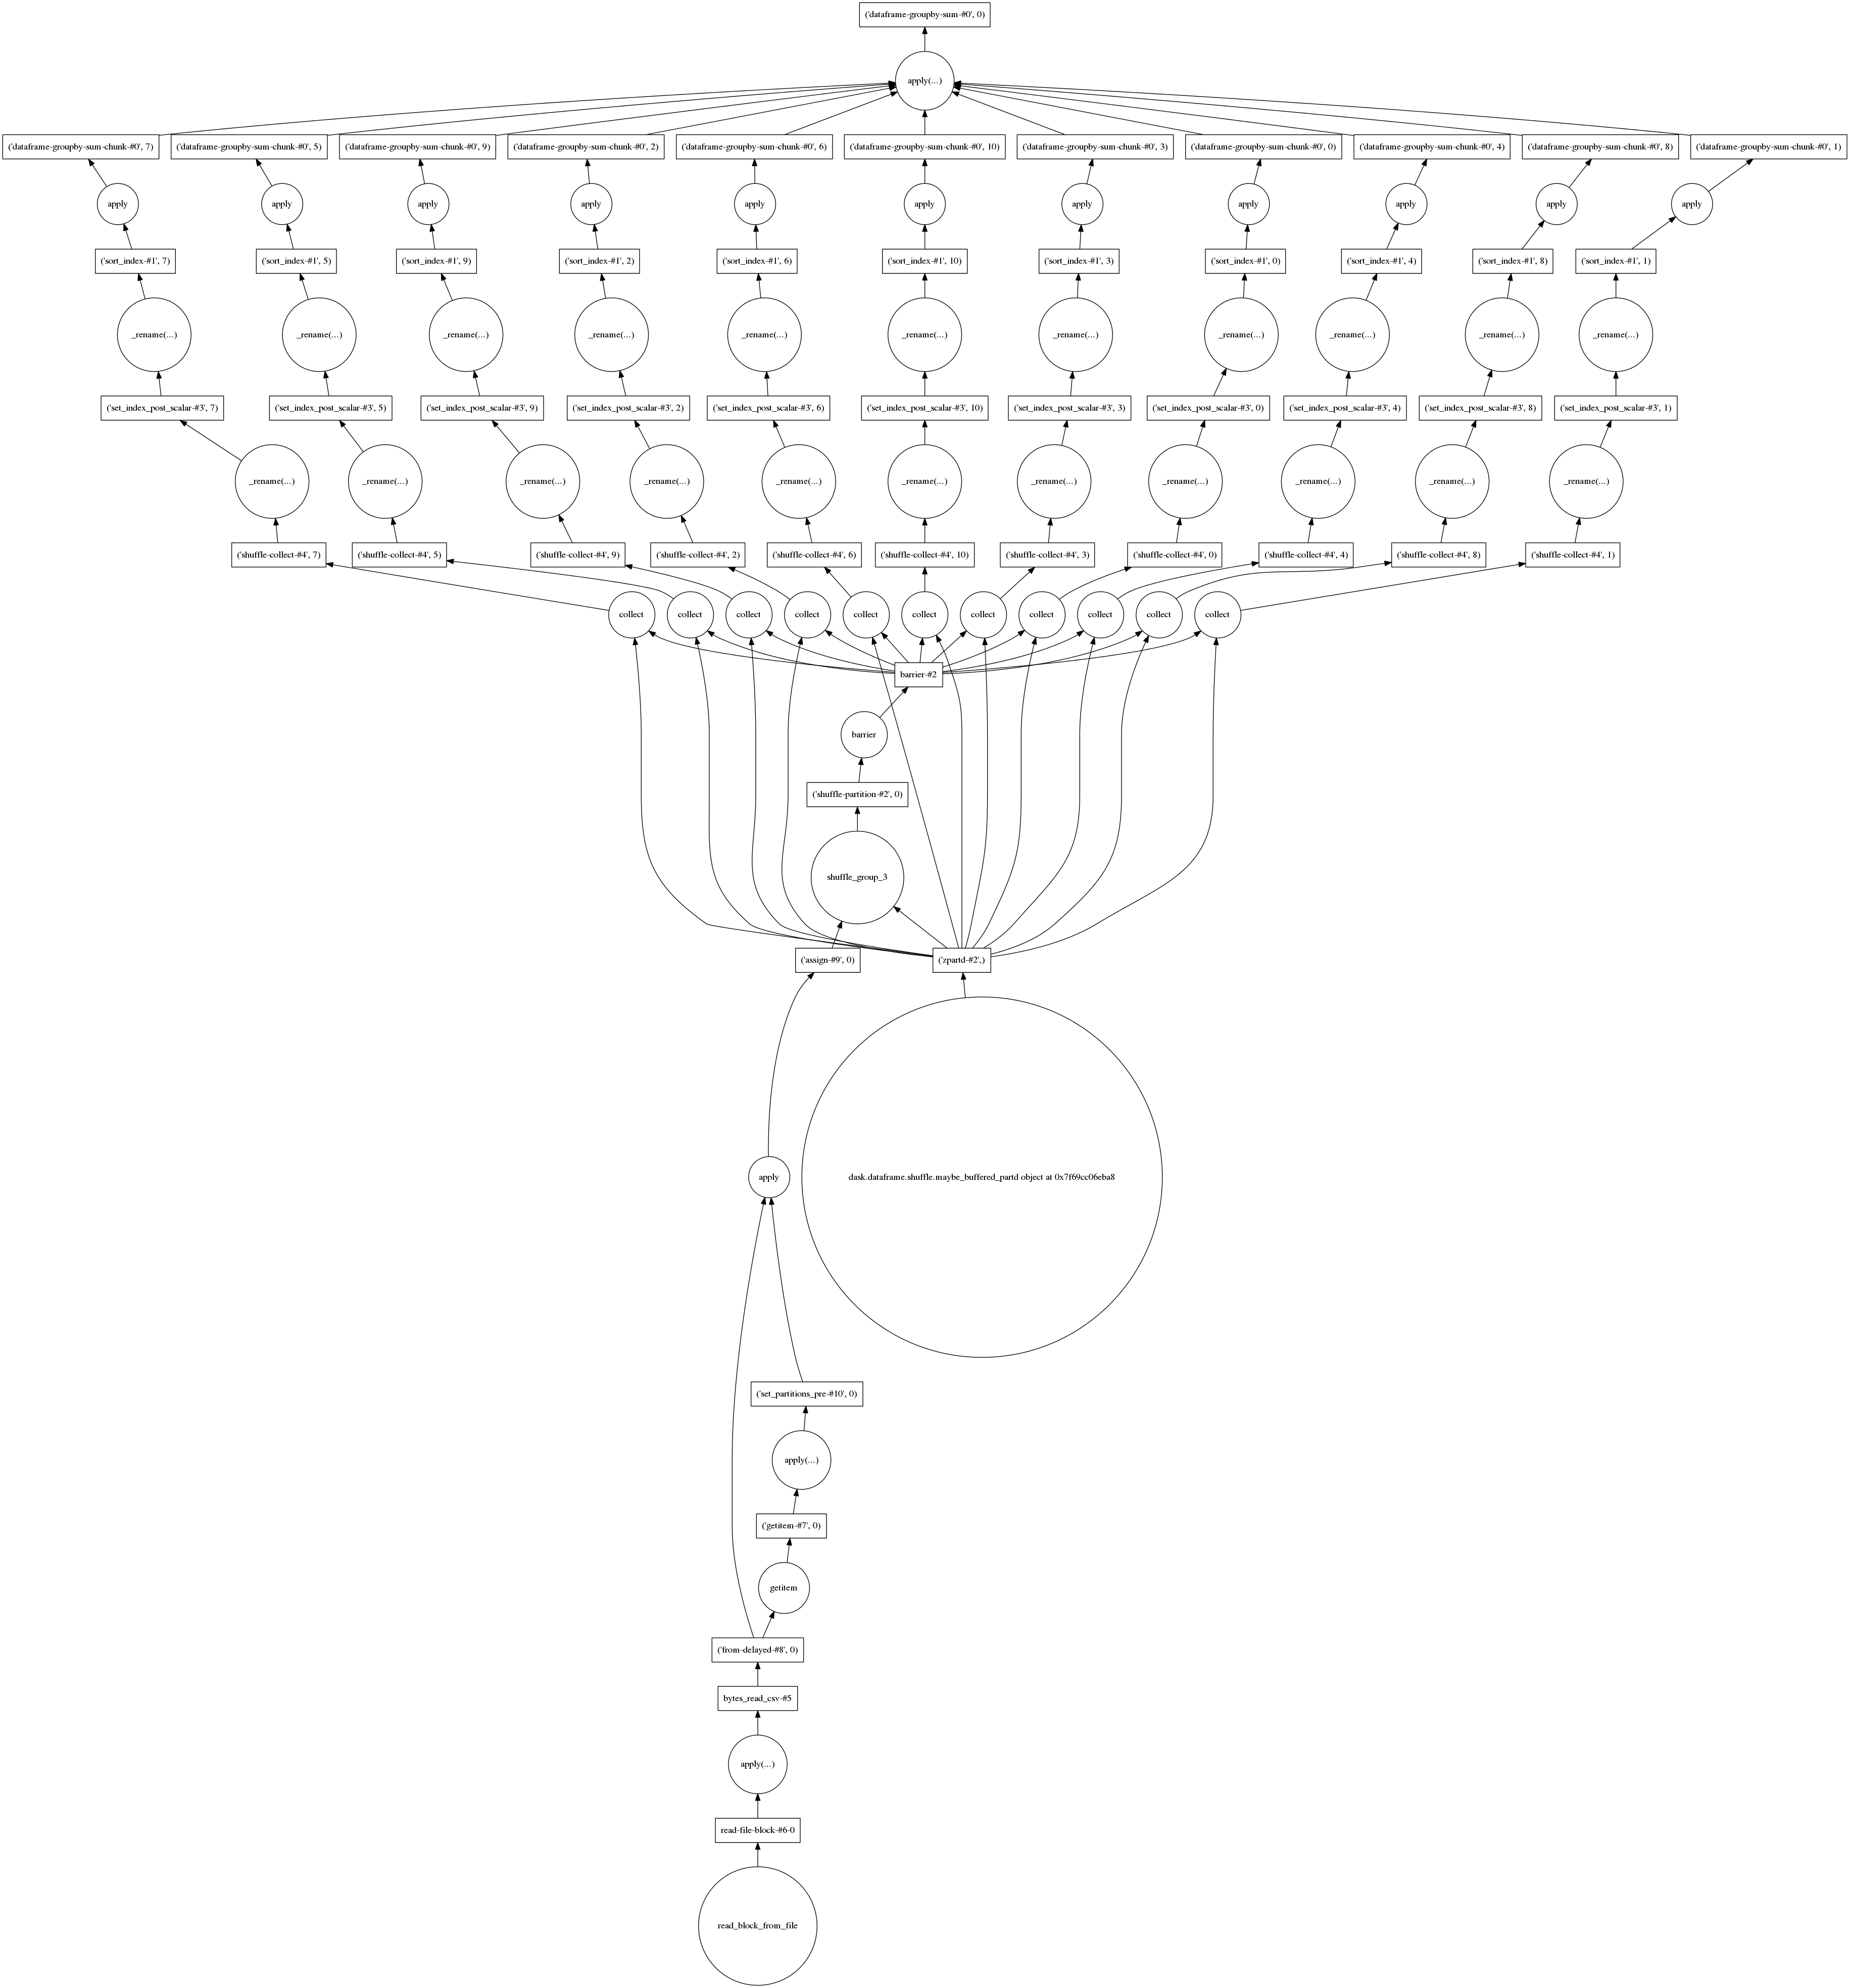

In [93]:
df3.groupby(['nationality', 'curr_pol_group_abbr']).sum().visualize()

In [94]:
df3.groupby(['nationality', 'curr_pol_group_abbr']).sum().compute()

num_opinions  num_speeches  num_motions  \
nationality    curr_pol_group_abbr                                            
Austria        aldeadle                        1           6.0          8.0   
               eensefa                         7           4.0          8.0   
               enf                            17          31.0         18.0   
               epp                            16          17.0         13.0   
               sd                              8          17.0         12.0   
Belgium        aldeadle                       16          27.0          8.0   
               ecr                            18           9.0          2.0   
               eensefa                         3          18.0          8.0   
               enf                             4           8.0          2.0   
               epp                            17          19.0          6.0   
               sd                             14          23.0          8.0   
Bulgaria       aldeadle                       28          11.0         11.0   
               ecr                             8           9.0          2.0   
               epp                            27          21.0         28.0   
               sd                             15          10.0          9.0   
Croatia        aldeadle                        7           4.0          3.0   
               ecr                             8           7.0          1.0   
               eensefa                         3           4.0          1.0   
               epp                            15          26.0          3.0   
               sd                             14          12.0          2.0   
Cyprus         ecr                             1           3.0          5.0   
               engl                            5           7.0          8.0   
               epp                             3           6.0          5.0   
               sd                              3           9.0          7.0   
Czech Republic aldeadle                       23          15.0          5.0   
               ecr                            14          13.0         17.0   
               efd                             0           4.0          1.0   
               engl                            4           5.0          9.0   
               epp                            23          23.0         14.0   
               sd                              6           5.0          8.0   
...                                          ...           ...          ...   
Romania        ecr                             1           1.0          1.0   
               enf                             3           6.0          1.0   
               epp                             9          18.0         17.0   
               sd                             35          32.0         25.0   
Slovakia       ecr                            12          10.0         19.0   
               epp                            20          24.0         12.0   
               sd                              6          10.0         16.0   
Slovenia       aldeadle                        1           4.0          1.0   
               eensefa                         8           5.0          1.0   
               epp                            15          22.0         25.0   
               sd                              0           7.0          4.0   
Spain          aldeadle                        4          11.0          4.0   
               eensefa                         9          12.0          4.0   
               engl                            7           5.0          6.0   
               epp                             4          18.0         19.0   
               sd                              7           5.0          6.0   
Sweden         aldeadle                       17           9.0         13.0   
               eensefa                        16          14.0          6.0   
       

### Dask Bags: Parallelized objects

In [95]:
db = bag.read_text('../data/europarl_speech_text.txt')

In [96]:
db.take(2)

('"Resolutionen tar upp den humanitära katastrofen i Syrien, med särskilt fokus på situationen i Aleppo. Jag välkomnar att alla parter, särskilt Ryssland och Assadregimen, uppmanas upphöra med angrepp mot civilbefolkningen och den civila infrastrukturen. Jag valde därför att rösta ja till resolutionen. Samtidigt konstaterar jag att resolutionen kunnat gå längre i fråga om de ryska bombningarna mot civila. Vad som nu sker i östra Aleppo, med attacker mot bland annat sjukhus, är enligt samstämmiga bedömningar inget mindre än brott mot krigets lagar och internationell rätt. Detta borde Europaparlamantet understryka."\n',
 '"Idag röstade Europaparlamentet om en resolution rörande en europeisk åklagarmyndighet, med bedrägeribekämpning som arbetsuppgift. Ett sådant förslag presenterades förra mandatperioden av EU-kommissionen, och har länge varit omtvistat, men har hittills inte fått stöd i ministerrådet. I Sverige har riksdagens justitieutskott i full enighet underkänt förslaget i en så kal

In [97]:
db.filter(lambda x: 'Czech' in x)

dask.bag<filter-..., npartitions=1>

In [98]:
db.filter(lambda x: 'Czech' in x).take(3)

('"I have voted in favour of the proposal for a Council decision authorising certain Member States to accept, in the interest of the European Union, the accession of the Republic of Korea to the 1980 Hague Convention on the Civil Aspects of International Child Abduction. The accession of South Korea to the Convention is to be welcomed. The European Commission has evaluated the functioning of South Korea\'s justice system and the country\'s willingness to implement the Convention, and considers that it is desirable for the Convention to enter into force between the European Union and South Korea. However, a Council decision is necessary to authorise the Member States (except Denmark, which is excluded from the Union\'s civil justice policy, and the Czech Republic, Ireland and Lithuania, which have already accepted the accession of South Korea) to accept the accession of the Republic of Korea. This will allow the Convention to enter into force between the Republic of Korea and the entire

In [99]:
db.filter(lambda x: 'Czech' in x).str.split().concat().frequencies().topk(100)

dask.bag<topk-pa..., npartitions=1>

In [100]:
db.filter(lambda x: 'Czech' in x).str.split().concat().frequencies().topk(100).compute()

[('„zielone', 1),
 ('„,.', 1),
 ('“regional', 1),
 ('“major', 1),
 ('‘yes’.', 1),
 ('‘yes,', 1),
 ('‘we', 2),
 ('‘socialist’', 1),
 ('‘silver', 1),
 ('‘opt', 1),
 ('‘job', 1),
 ('‘fulfil', 1),
 ('‘fall', 1),
 ('‘democracy’', 1),
 ('‘and', 1),
 ('‘Please', 1),
 ('‘I', 1),
 ('‘European', 2),
 ('‘Advocates', 1),
 ('–', 57),
 ('ότι', 1),
 ('όπως', 1),
 ('χωρών', 1),
 ('φέτας', 1),
 ('φέτα', 1),
 ('των', 2),
 ('τον', 1),
 ('τομέας', 1),
 ('το', 2),
 ('τις', 1),
 ('της', 6),
 ('την', 1),
 ('τη', 2),
 ('τα', 2),
 ('τίτλο', 1),
 ('συμφωνία', 1),
 ('συμφέροντα', 1),
 ('συμβεί', 2),
 ('στην', 1),
 ('σημαντικά', 1),
 ('πρόσφατα', 1),
 ('προϊόντος', 1),
 ('προϊόντα', 1),
 ('προωθεί', 1),
 ('προσωρινά', 1),
 ('προστασίας.', 1),
 ('προστασία', 1),
 ('προβλέπεται', 1),
 ('προέλευσης', 1),
 ('που', 3),
 ('πορτοκάλια', 1),
 ('πλήττονται', 1),
 ('πλέον', 1),
 ('περιβαλλοντικός', 1),
 ('πενταετία', 1),
 ('παραγωγοί', 1),
 ('παραγωγής', 1),
 ('παράλληλα,', 1),
 ('ονομασίας', 1),
 ('οι', 2),
 ('ο', 1),
 ('